# What are Most used programming languages and databases in Brazil?
### A data set analysis using Stackoverflow Survey Results from 2019 to 2021

## Introduction
The main goal of this work is to find out what are the most used and wanted programming languages and databases in Brazil in the last 3 years.
We also can see if the newest fields in applied informatics, like artificial intelligence, data science, autonomous vehicles or blockchain, just to name a few, have impacted the use and demand for programming languages and databases.

For this, we are going to use data from Stackoverflow’s 2019 to 2021 Annual Developer Survey.
Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, jobs, code style and various other information.

# Business Understanding
The main goal of this work is to find out the most common used and wanted programming languages and databases in Brazil in the last 3 years. To accomplish this task the need to answer these 4 questions:

### Regarding Programming Languages
1. What are the most used programming language in Brazil in the last 3 years?
2. What are the most wanted programming language in Brazil in the last 3 years?

### Regarding Databases:
3. What are the most used database in Brazil in the last 3 years?
4. What are the most wanted database in Brazil in the last 3 years?

## Data Understanding

In [2]:
import pandas as pd
import numpy as np
from collections import Counter

# to visualise all the columns in the dataframe
pd.set_option("display.max_columns", None, "display.max_rows", None)

# Libs to visuzalizations
import matplotlib.pyplot as plt
import seaborn as sns

# changing style of the plots
sns.set(style="darkgrid")



# Hiding warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading datasets
df_2019 = pd.read_csv('datasets/survey_results_public_2019.csv')
df_2020= pd.read_csv('datasets/survey_results_public_2020.csv')
df_2021= pd.read_csv('datasets/survey_results_public_2021.csv')


In [4]:
df_2019.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [5]:
df_2020.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [7]:
df_2021.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

## Data Preparation

In [8]:
def filter_df(df, column_to_filter, value_of_filter, columns):
    ''' Filter a dataframe by colum_to_filter, value of the filter and columns.
        returns the filtered dataframe.

        columns_to_filter = name of the dataframe column to filter (string)
        value_of_filter = value of the filter
        columns = columns in the filtered dataframe
    '''

    df_clone = df
    for column in columns:
        df_clone = df_clone[df_clone[column_to_filter]==value_of_filter].dropna(subset=[column])
    return df_clone

In [9]:
# Loading the 3 datasets and handling missings in the columns of interest
data_2019 = filter_df(df_2019, 'Country', 'Brazil', ['LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear'])
data_2020 = filter_df(df_2020, 'Country', 'Brazil', ['LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear'])
data_2021 = filter_df(df_2021, 'Country', 'Brazil', ['LanguageHaveWorkedWith','LanguageWantToWorkWith','DatabaseHaveWorkedWith','DatabaseWantToWorkWith'])

The code above drops missings values in the most important columns.  The filter function defined above uses dropna to handle missing values.

In [10]:
# Getting computer languages from year 2019 to 2021 as pandas series

work_language_2019 = data_2019['LanguageWorkedWith'].apply(lambda x: x.split(';'))
want_work_language_2019 = data_2019['LanguageDesireNextYear'].apply(lambda x: x.split(';'))

work_language_2020 = data_2020['LanguageWorkedWith'].apply(lambda x: x.split(';'))
want_work_language_2020 = data_2020['LanguageDesireNextYear'].apply(lambda x: x.split(';'))

work_language_2021 = data_2021['LanguageHaveWorkedWith'].apply(lambda x: x.split(';'))
want_work_language_2021 = data_2021['LanguageWantToWorkWith'].apply(lambda x: x.split(';'))

In [11]:
# Getting databases infos from year 2019 to 2021 as pandas series

work_database_2019 = data_2019['DatabaseWorkedWith'].apply(lambda x: x.split(';'))
want_work_database_2019 = data_2019['DatabaseDesireNextYear'].apply(lambda x: x.split(';'))

work_database_2020 = data_2020['DatabaseWorkedWith'].apply(lambda x: x.split(';'))
want_work_database_2020 = data_2020['DatabaseDesireNextYear'].apply(lambda x: x.split(';'))

work_database_2021 = data_2021['DatabaseHaveWorkedWith'].apply(lambda x: x.split(';'))
want_work_database_2021 = data_2021['DatabaseWantToWorkWith'].apply(lambda x: x.split(';'))

In [12]:
def flat_list(arr):
    ''' Flat a nested list,
        returns a flatted list.
    '''
    
    data_objs = []
    
    for row in arr:
        for obj in row:
            data_objs.append(obj.strip())
            
    return  data_objs

In [13]:
# Flatted list for computer languages - HaveWorkd and WantToWork from 2019 and 2021

list_work_language_2019 = flat_list(work_language_2019)
list_want_work_language_2019 = flat_list(want_work_language_2019)

list_work_language_2020 = flat_list(work_language_2020)
list_want_work_language_2020 = flat_list(want_work_language_2020)

list_work_language_2021 = flat_list(work_language_2021)
list_want_work_language_2021 = flat_list(want_work_language_2021)

In [14]:
# Flatted list for databases - HaveWorkd and WantToWork from 2019 and 2021

list_work_database_2019 = flat_list(work_database_2019)
list_want_work_database_2019 = flat_list(want_work_database_2019)

list_work_database_2020 = flat_list(work_database_2020)
list_want_work_database_2020 = flat_list(want_work_database_2020)

list_work_database_2021 = flat_list(work_database_2021)
list_want_work_database_2021 = flat_list(want_work_database_2021)

In [15]:
def group_list(data_list, year):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language/Database':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict



In [16]:
# List and Dictionary for programming languages from 2019 to 2021
dict_work_languages_2019 = group_list(list_work_language_2019, '2019')
dict_want_work_languages_2019 = group_list(list_want_work_language_2019, '2019')

dict_work_languages_2020 = group_list(list_work_language_2020, '2020')
dict_want_work_languages_2020 = group_list(list_want_work_language_2020, '2020')

dict_work_languages_2021 = group_list(list_work_language_2021, '2021')
dict_want_work_languages_2021 = group_list(list_want_work_language_2021, '2021')

In [17]:
# List and Dictionary for databases from 2019 to 2021
dict_work_databases_2019 = group_list(list_work_database_2019, '2019')
dict_want_work_databases_2019 = group_list(list_want_work_database_2019, '2019')

dict_work_databases_2020 = group_list(list_work_database_2020, '2020')
dict_want_work_databases_2020 = group_list(list_want_work_database_2020, '2020')

dict_work_databases_2021 = group_list(list_work_database_2021, '2021')
dict_want_work_databases_2021 = group_list(list_want_work_database_2021, '2021')

In [18]:
def create_dataframe(data_dicts):
    ''' Create 3 dataframes and add them together,
        returns a appended dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])
    df3 = pd.DataFrame(data_dicts[2])

    df = df1.append(df2)
    df = df.append(df3)
    
    return df

# Creating the dataframes to be used in the plots
worked_languages = create_dataframe([dict_work_languages_2019, dict_work_languages_2020,dict_work_languages_2021])
wanted_languages = create_dataframe([dict_want_work_languages_2019, dict_want_work_languages_2020,dict_want_work_languages_2021])


worked_databases = create_dataframe([dict_work_databases_2019, dict_work_databases_2020,dict_work_databases_2021])
wanted_databases = create_dataframe([dict_want_work_databases_2019, dict_want_work_databases_2020,dict_want_work_databases_2021])

In [19]:
def percentage(df, column):
    ''' Scale data,
        returns data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series



In [20]:
# Calculating the percentage for programming languages
worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')

In [21]:
# Calculating the percentage for databases
worked_databases['Percentage'] = percentage(worked_databases, 'Year')
wanted_databases['Percentage'] = percentage(wanted_databases, 'Year')

In [22]:
# Get the top 20 languages
top_worked_lang = worked_languages.sort_values(by=['Percentage'], ascending=False).head(20)['Programming Language/Database'].unique()
top_wanted_lang = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(20)['Programming Language/Database'].unique()

worked_lang_chart = worked_languages[worked_languages['Programming Language/Database'].isin(top_worked_lang)]
wanted_lang_chart = wanted_languages[wanted_languages['Programming Language/Database'].isin(top_worked_lang)]

## 1. What are the most used and most wanted programming Languages in Brazil in the last 3 years?

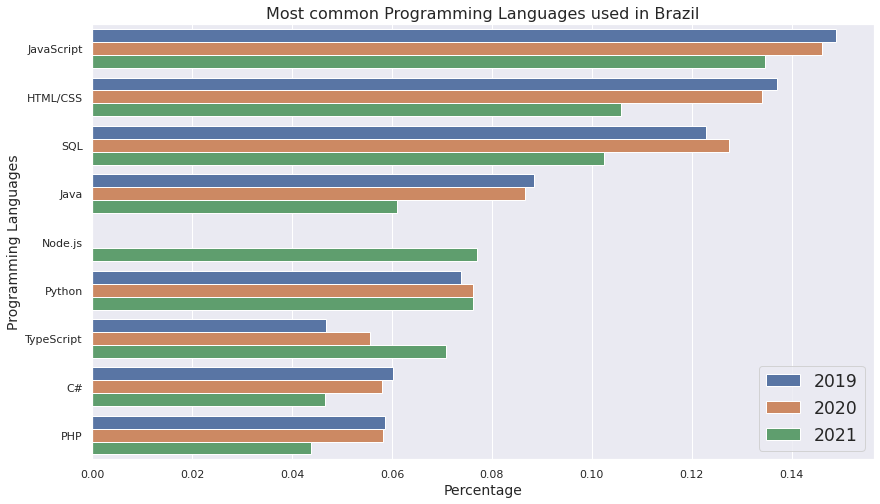

In [23]:
# Figure 1 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language/Database',
            hue = 'Year',
            data = worked_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Programming Languages used in Brazil', size = 16)
plt.show()

We can see Javascript, HTML/CSS and SQL has been the most common programming languages in Brazil in the last 3 years while C# and PHP are losing their share very fast.

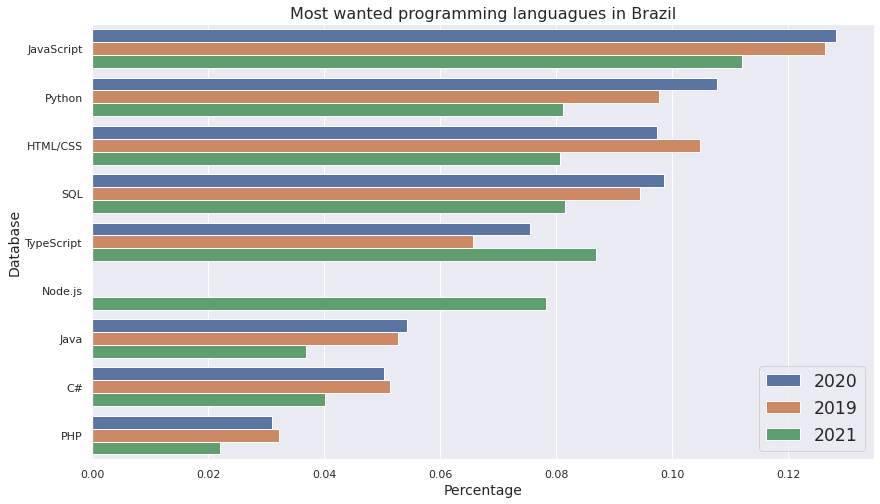

In [24]:
# Figure 1 — Percentage of most wanted programming languages in Brazil 
# databases by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language/Database',
            hue = 'Year',
            data = wanted_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Database", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most wanted programming languagues in Brazil', size = 16)
plt.show()

Python have grown tremendously close to other languages as the most wanted languages probably because its’s a programming language that is very versatile and has been used extensively in data science related areas.

As we can see, JavaScript has been in top of list for the last 3 years standing as the most commonly-used language in Brazil, followed by HTML/CSS, SQL and Java. I was expecting to see Python, R and probably Julia in this ranks but only Python appears.

We also can see and interesting fact: even though JavaScript, HTML/CSS and SQL is still in the top of the list of most wanted programming languages, Python has climbed to the top and currently is 2nd most wanted programming language probably because of the newest and hottest field of data science and artificial intelligence that are mainly focused in Python.

## 2. What are the most used and most wanted databases in Brazil in the last 3 years?

In [25]:
# Get the top 20 databases
top_worked_databases = worked_databases.sort_values(by=['Percentage'], ascending=False).head(20)['Programming Language/Database'].unique()
top_wanted_databases = wanted_databases.sort_values(by=['Percentage'], ascending=False).head(20)['Programming Language/Database'].unique()

worked_database_chart = worked_databases[worked_databases['Programming Language/Database'].isin(top_worked_databases)]
wanted_database_chart = wanted_databases[wanted_databases['Programming Language/Database'].isin(top_worked_databases)]

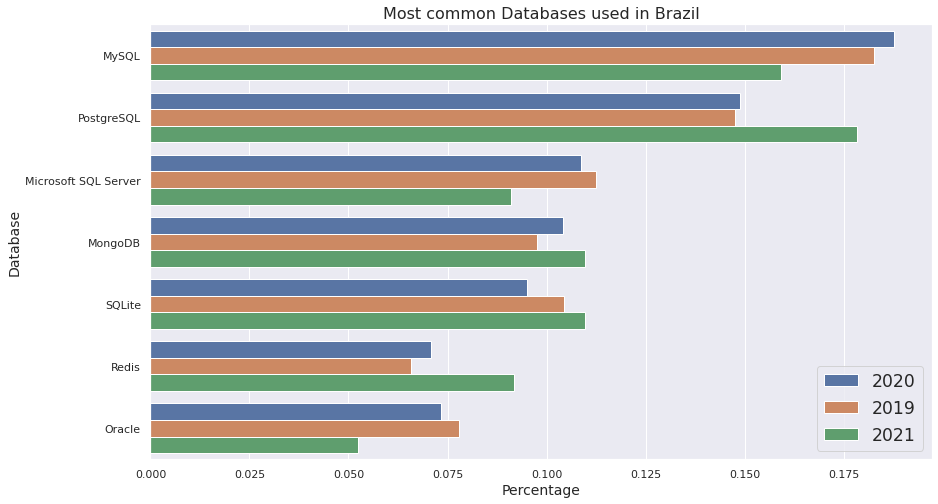

In [26]:
# Figure 1 — Percentage of use databases flavors among all the cited programming 
# databases by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language/Database',
            hue = 'Year',
            data = worked_database_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Database", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Databases used in Brazil', size = 16)
plt.show()

The 2 most common used databases in Brazil in the last 3 years is MySQL and Postgresql with Microsoft SQL Server losing his market share to the non-commercial flavors.

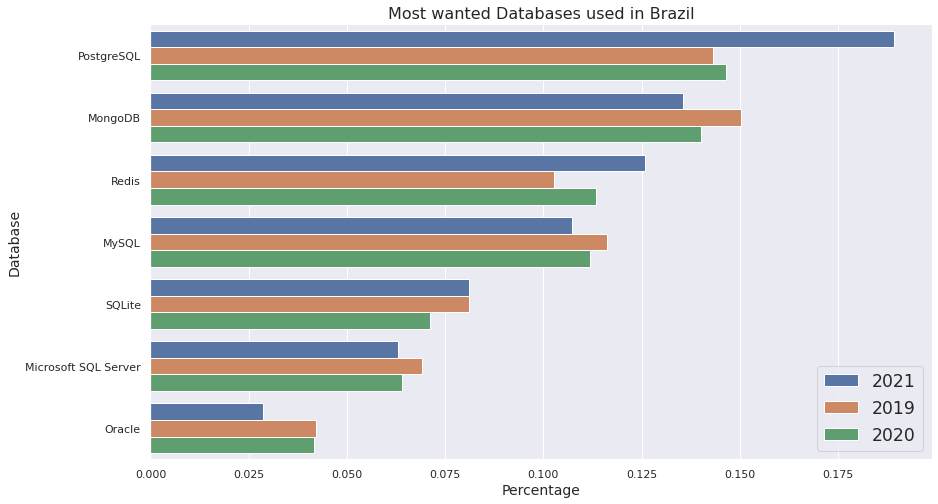

In [27]:
# Figure 1 — Percentage of use most wanted databases flavors among all the cited programming 
# databases by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language/Database',
            hue = 'Year',
            data = wanted_database_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Database", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most wanted Databases used in Brazil', size = 16)
plt.show()

The most common databases in Brazil was MySQL that was at the top from 2019 to 2020, followed closely by Postgresql. In 2021, Postgresql finally climbed to the top as most used database in Brazil, accordingly to the Stackoverflow survey results.

Here can see that Postgresql is still at the top of the rank as the most used and wanted database in Brazil followed by MongoDB.
An interesting fact here is that MySQL, that was at top of most used databases in Brazil in 2019/2020 went down several positions in the rank. The same happened with the non-free flavors Microsoft SQL Server and Oracle both in the last positions in the list.

# Conclusion

The idea of this article was to take a look at the most used and wanted programming languages and databases in Brazil comparing theses results from 2019 to 2021.
We saw that Python is climbing fast to the top positions probably because the data science field in Brazil are increasing fast in the last two years and are mainly for python programmers, even though R and Julia shows their importance in several job offers.
Javascript, HTML/CSSS and SQL has been the most used and wanted programming languages in Brazil for the last 3 years and are perfect choices for anyone that wants to learn a new programming language.
Regarding the databases, we saw that the commercial versions Microsoft SQL Server and Oracle are not in demand and are both at the bottom of the most wanted databases while Postgresql and MySql are still in the first positions, followed by MongoDB